In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
from matplotlib import pyplot
from  matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [31]:
# loading airpassengers dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/airline-passengers.csv'
data = pd.read_csv(url, header = 0, index_col = 0 , parse_dates = True)
print(data)
print("Data types: ")
print(data.dtypes)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]
Data types: 
Passengers    int64
dtype: object


In [32]:
print(data.index)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


In [33]:
# convert to timeseries
ts = data['Passengers']
ts.head(10)
print("Indexing time series array")
ts['1949-01-01']

Indexing time series array


np.int64(112)

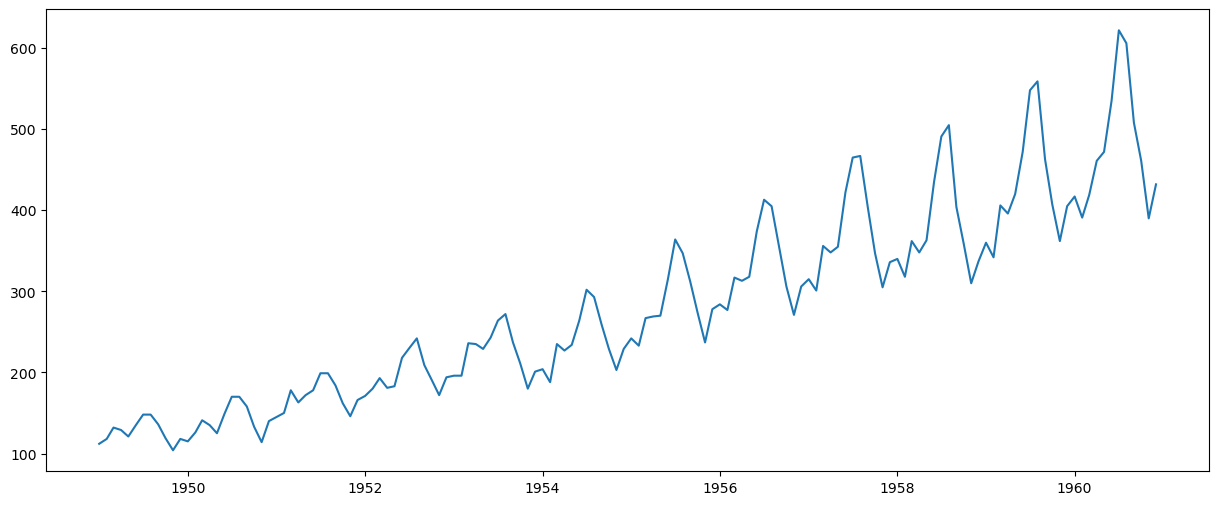

In [34]:
# check stationarity
plt.plot(ts)

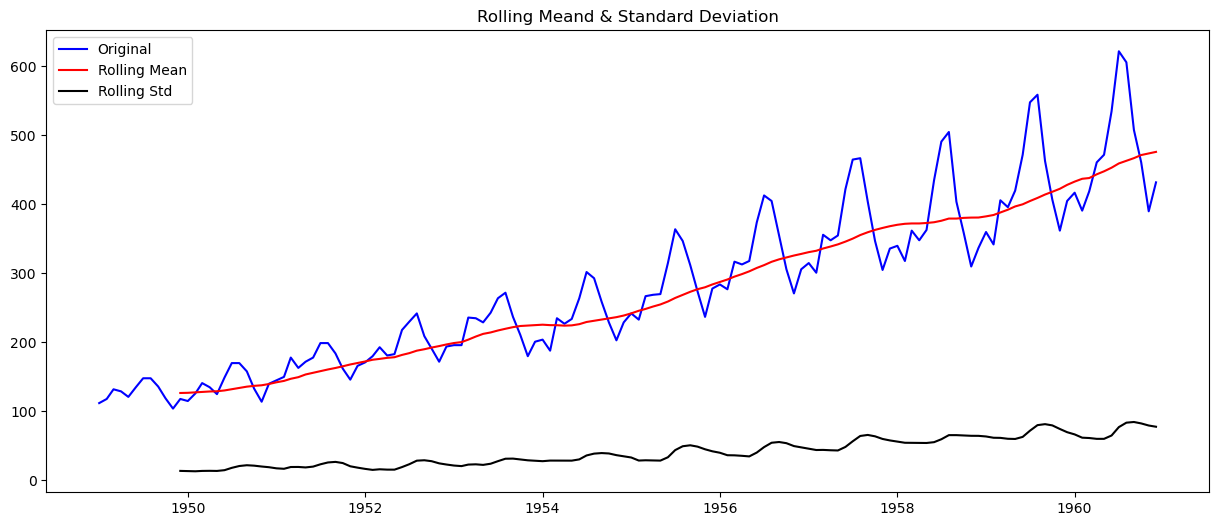

Results of Dickey Fuller test
<----dfoutput---->
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [35]:
# stationarity test
# H0: TS is non-Stationary
# H1: TS is stationary

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # determine rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    # plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue',label='Original')
    mean = plt.plot(rolmean, color = 'red', label='Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label='Rolling Std')

    plt.legend(loc = 'best')
    plt.title('Rolling Meand & Standard Deviation')
    plt.show(block=False)

    # perform Dickey Fuller test
    print("Results of Dickey Fuller test")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations used'])

    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print('<----dfoutput---->')
    print(dfoutput)

test_stationarity(ts)




    

In [36]:
print("Head")
print(ts.head(5))

Head
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64


In [37]:
print("Computing log of the series")
ts_log = np.log(ts)
print("ts_log", ts_log.head(5))

Computing log of the series
ts_log Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: Passengers, dtype: float64


checking stationarity of the series after applying log


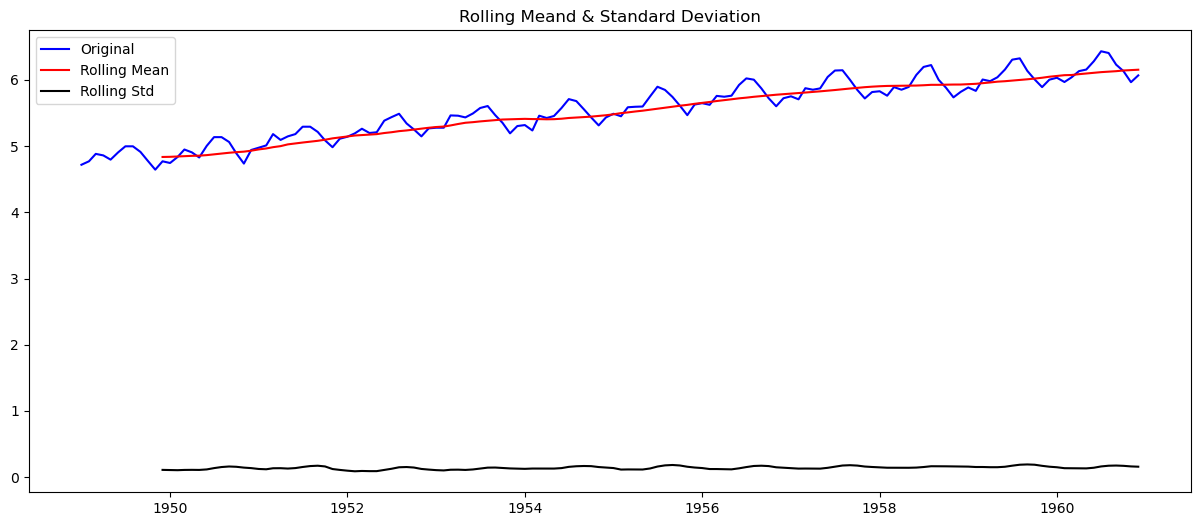

Results of Dickey Fuller test
<----dfoutput---->
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [38]:
print("checking stationarity of the series after applying log")
test_stationarity(ts_log)

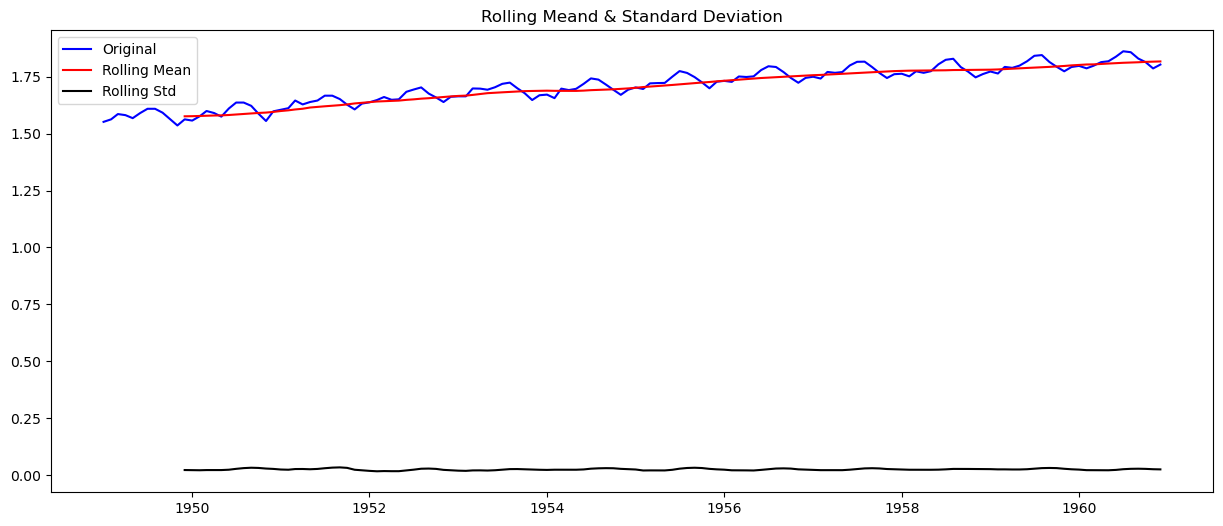

Results of Dickey Fuller test
<----dfoutput---->
Test Statistic                  -2.156028
p-value                          0.222590
#Lags Used                      13.000000
Number of Observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [39]:
ts_doublelog = np.log(ts_log)
test_stationarity(ts_doublelog)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: Passengers, dtype: float64

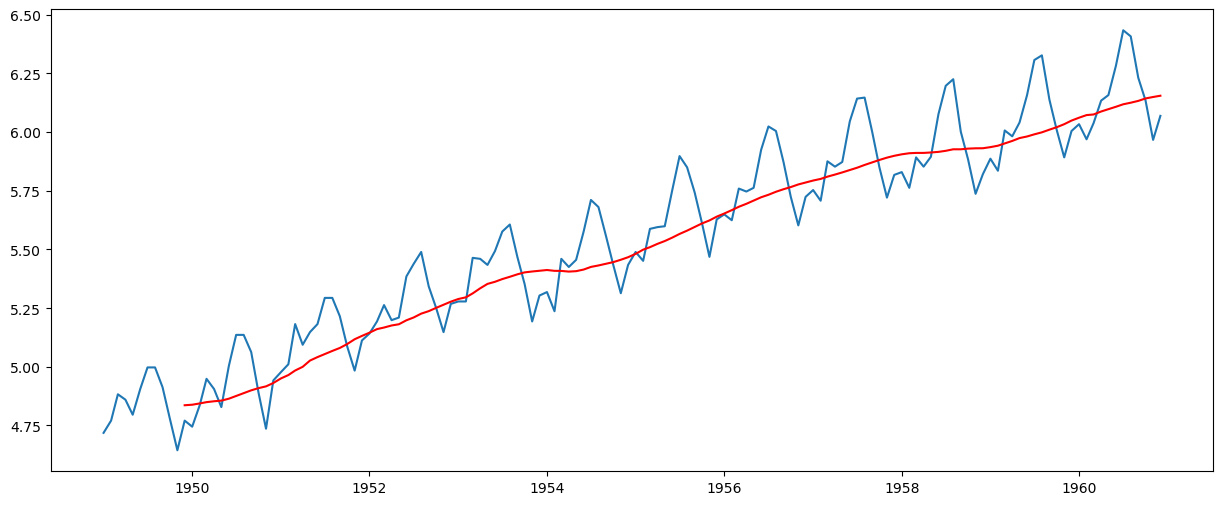

In [40]:
# Compute 12-month moving average
# ma = ts.rolling(window=12).mean()
# plt.plot(ts, label='Original')
# plt.plot(ma, label='Moving Avg', color='red')
# plt.legend()
# plt.show()

moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)

plt.plot(moving_avg, color = 'red')


ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(5)

ts_log_moving_avg_diff.dropna(inplace = True)
ts_log_moving_avg_diff.head(5)

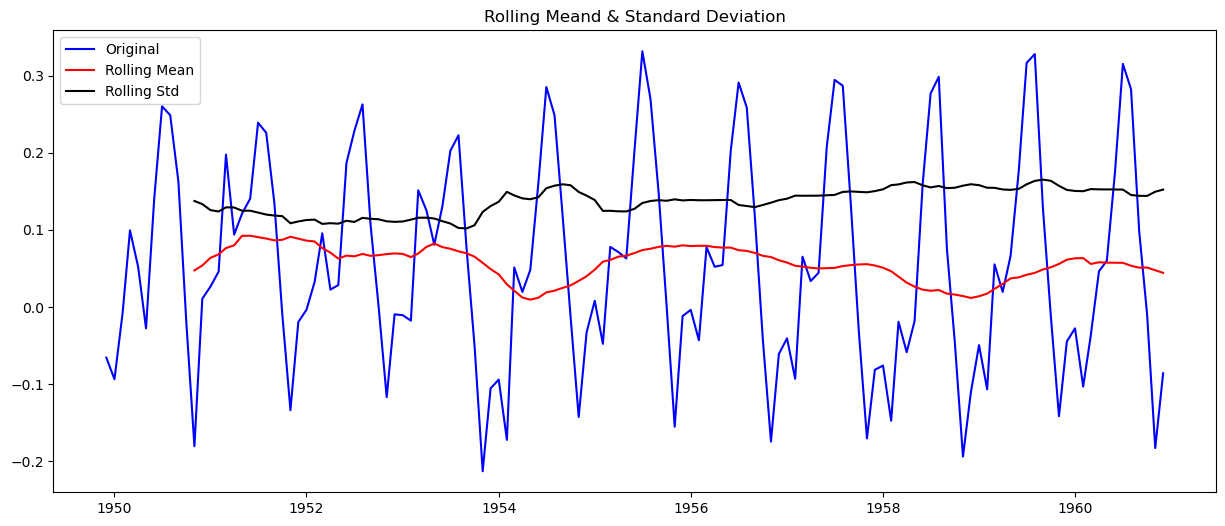

Results of Dickey Fuller test
<----dfoutput---->
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


In [41]:
test_stationarity(ts_log_moving_avg_diff)

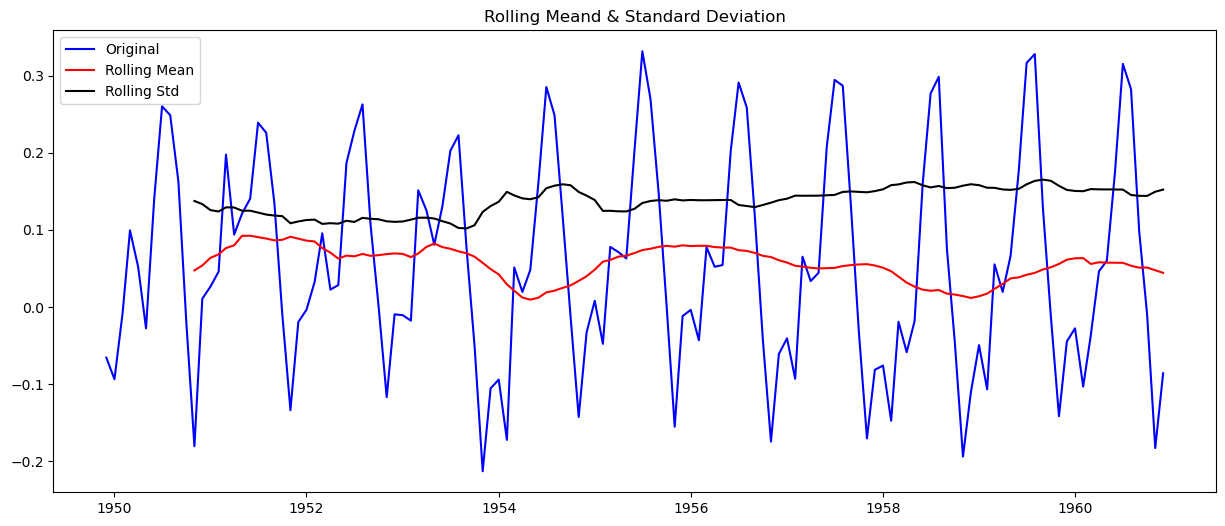

Results of Dickey Fuller test
<----dfoutput---->
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


In [42]:
test_stationarity(ts_log_moving_avg_diff)

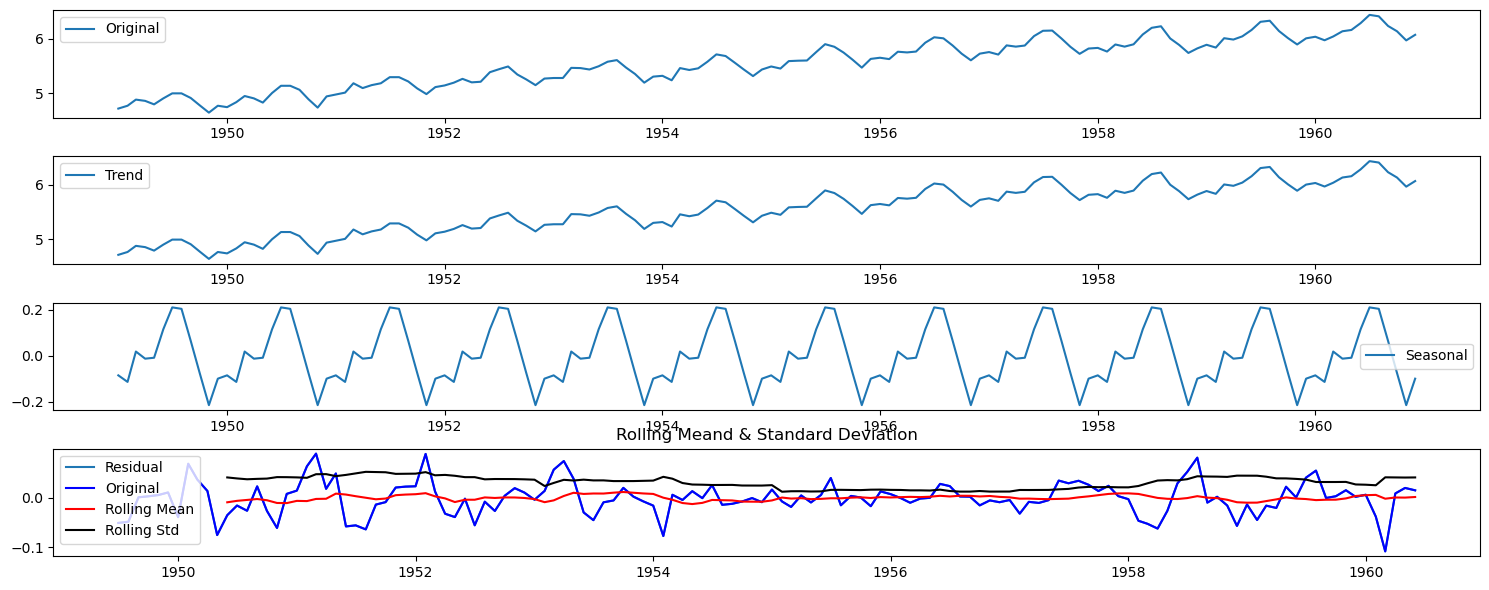

Results of Dickey Fuller test
<----dfoutput---->
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations used    1.220000e+02
Critical value (1%)           -3.485122e+00
Critical value (5%)           -2.885538e+00
Critical value (10%)          -2.579569e+00
dtype: float64


In [49]:
# Decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal  = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(ts_log, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')


plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

plt.tight_layout()

ts_log_decompose = residual
ts_log_decompose.dropna(inplace = True)

test_stationarity(ts_log_decompose)

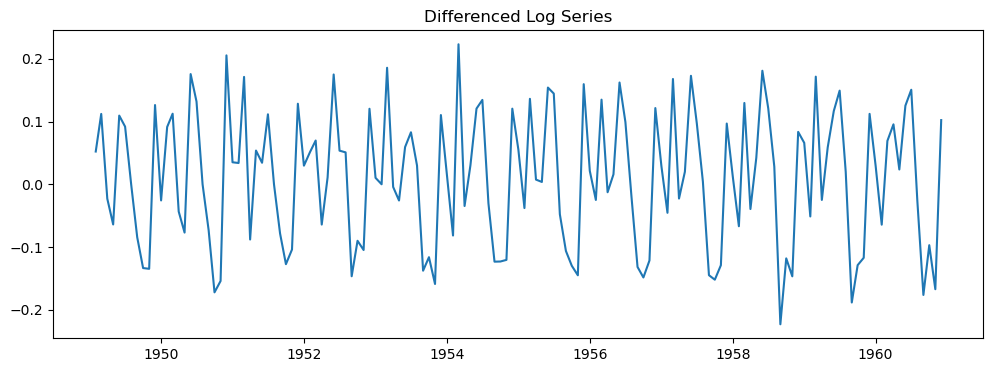

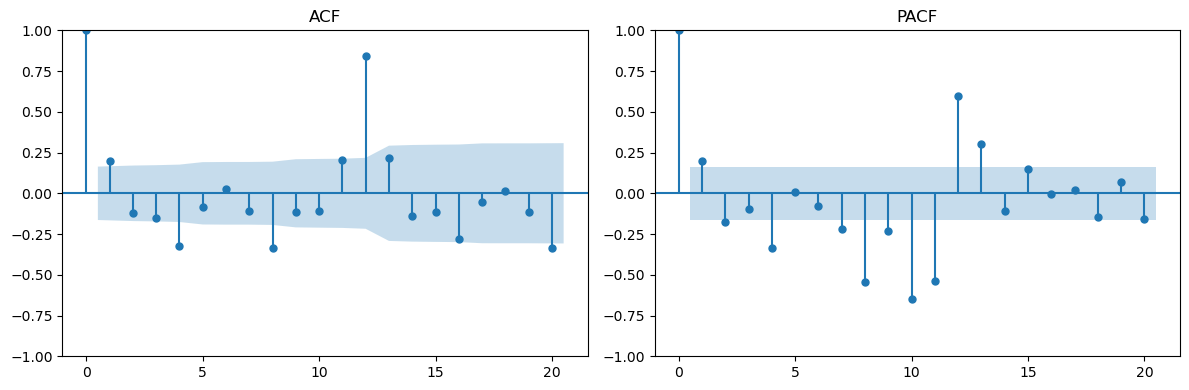

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 128.890
Date:                Tue, 27 Jan 2026   AIC                           -247.780
Time:                        16:15:51   BIC                           -232.965
Sample:                    01-01-1949   HQIC                          -241.760
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2432      0.166      1.469      0.142      -0.081       0.568
ar.L2          0.2677      0.199      1.344      0.179      -0.123       0.658
ma.L1         -0.0867      0.118     -0.732      0.4

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Better for plots

# Differencing (drop NaN)
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff = ts_log_diff.dropna()  # Remove leading NaN

plt.figure(figsize=(12,4))
plt.plot(ts_log_diff)
plt.title('Differenced Log Series')
plt.show()

# ACF & PACF plots (handles NaN automatically)
plt.figure(figsize=(12,4))
plt.subplot(121)
plot_acf(ts_log_diff, lags=20, ax=plt.gca(), title='ACF')
plt.subplot(122)
plot_pacf(ts_log_diff, lags=20, ax=plt.gca(), title='PACF', method='ols')
plt.tight_layout()
plt.show()

# Updated ARIMA import (no error)
from statsmodels.tsa.arima.model import ARIMA  # New version
model = ARIMA(ts_log, order=(2,1,2))  # Example order from PACF/ACF
results = model.fit()
print(results.summary())
